In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn import model_selection
%matplotlib inline

## Load Dataset

In [5]:
boston_ds = load_boston()
# print(boston_ds['DESCR'])

In [22]:
x = boston_ds.data
y = boston_ds.target
print(x.shape)
print(y.shape)
# print(y)

(506, 13)
(506,)


In [60]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.25) # split ds into train and test
train_dl = pd.DataFrame(x_train, columns = boston_ds.feature_names) # 13 features in total
print(train_dl)
print(x_train.shape)
print(y_train.shape)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
0    6.28807   0.0  18.10   0.0  0.740  6.341  96.4  2.0720  24.0  666.0   
1    3.84970   0.0  18.10   1.0  0.770  6.395  91.0  2.5052  24.0  666.0   
2    0.51183   0.0   6.20   0.0  0.507  7.358  71.6  4.1480   8.0  307.0   
3    1.46336   0.0  19.58   0.0  0.605  7.489  90.8  1.9709   5.0  403.0   
4    0.19657  22.0   5.86   0.0  0.431  6.226  79.2  8.0555   7.0  330.0   
..       ...   ...    ...   ...    ...    ...   ...     ...   ...    ...   
374  0.03551  25.0   4.86   0.0  0.426  6.167  46.7  5.4007   4.0  281.0   
375  6.53876   0.0  18.10   1.0  0.631  7.016  97.5  1.2024  24.0  666.0   
376  0.01439  60.0   2.93   0.0  0.401  6.604  18.8  6.2196   1.0  265.0   
377  2.14918   0.0  19.58   0.0  0.871  5.709  98.5  1.6232   5.0  403.0   
378  0.16760   0.0   7.38   0.0  0.493  6.426  52.3  4.5404   5.0  287.0   

     PTRATIO       B  LSTAT  
0       20.2  318.01  17.79  
1       20.2  391.34  13.27

In [61]:
train_dl["MEDV"] = y_train
train_dl.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.819437,10.843008,11.446306,0.065963,0.560076,6.290712,69.148549,3.731110,9.815303,415.142480,18.511873,356.082691,12.748971,22.093668
std,8.730544,22.663189,6.855178,0.248546,0.119404,0.708406,28.155665,2.077845,8.793497,168.621883,2.223049,91.172359,7.005317,8.897438
min,0.009060,0.000000,0.740000,0.000000,0.392000,3.561000,2.900000,1.174200,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.090855,0.000000,5.320000,0.000000,0.453000,5.882500,46.950000,2.049300,4.000000,286.000000,17.400000,376.090000,7.185000,16.600000
50%,0.322640,0.000000,9.900000,0.000000,0.538000,6.208000,77.800000,3.092300,5.000000,337.000000,19.100000,391.130000,11.660000,21.100000
75%,3.843270,12.500000,18.100000,0.000000,0.639000,6.611000,94.100000,5.164950,24.000000,666.000000,20.200000,396.060000,17.140000,24.900000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000


## Connection between features and prices - examples

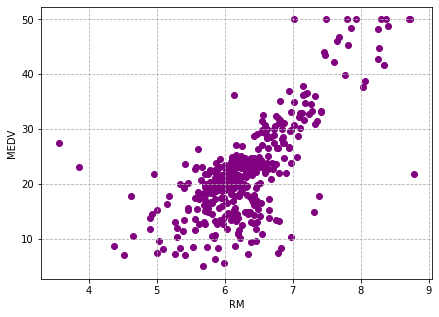

In [177]:
fig = plt.figure(figsize=(7,5))
plt.scatter(train_dl['RM'],train_dl['MEDV'],color='purple')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.grid(ls = '--')

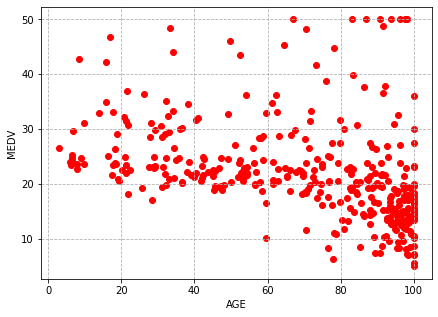

In [179]:
fig = plt.figure(figsize=(7,5))
plt.scatter(train_dl['AGE'],train_dl['MEDV'],color='red')
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.grid(ls = '--')

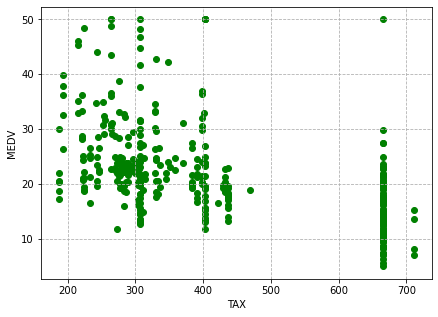

In [180]:
fig = plt.figure(figsize=(7,5))
plt.scatter(train_dl['TAX'],train_dl['MEDV'],color='green')
plt.xlabel('TAX')
plt.ylabel('MEDV')
plt.grid(ls = '--')

## Define Cost Function

In [155]:
def compute_cost(x,y,w):
    
    N = len(y)
    a = np.dot(x,w)
    c = np.sum((y-a)**2) / (2.0*N)
    
    return c

## SGD

In [138]:
def compute_gradient(x,w,y):
    
    N = len(y)
    error = np.dot(x,w) - y
    gd = np.dot(np.transpose(x),error) / float(N)
    
    return gd

In [303]:
def sgd_solver(x,y,freq,iteration,learning_rate):
    
    x_train = x.copy()
    x_add = np.ones((len(y),1))
    x_train = np.hstack([x_train,x_add])
    
    np.random.seed(123)
    w = np.random.uniform(-10,10,14)
    
    cost_save = []
    
    for i in range(iteration):
        
        cost_inner = compute_cost(x_train,y,w)
        cost_save.append(cost_inner)
        
        dw = compute_gradient(x_train,w,y)
        w = w - learning_rate*dw
        
        if i % freq == 0:
            print('The %d iteration, weight = %s' % (i, w))
            
    return w, cost_save

## Preprocessing

In [304]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
norm_scaler = preprocessing.MinMaxScaler()
x_train_std = std_scaler.fit_transform(x_train)

## Training

In [315]:
lr = 0.005
num_iter = 20000
print_freq = 2000

In [316]:
weight, cost = sgd_solver(x_train_std,y_train,print_freq,num_iter,lr)

The 0 iteration, weight = [ 3.90138759 -4.24081195 -5.48771769  1.01807271  4.34844498 -1.50336317
  9.56393338  3.72828475 -0.39775494 -2.17576916 -3.15111845  4.58021488
 -1.27228337 -8.65194152]
The 2000 iteration, weight = [-0.61402407 -0.25045666 -0.40204199  0.3846409  -1.0084765   3.0364357
  0.34502253 -1.00592117  0.90973147 -0.73448565 -2.40266724  0.61604716
 -3.51370336 22.09230628]
The 4000 iteration, weight = [-7.84447712e-01  2.68271429e-01  1.26576299e-02  4.29317994e-01
 -1.80364487e+00  3.14531931e+00 -1.26080751e-01 -2.17268210e+00
  1.39215130e+00 -1.34467141e+00 -2.37777446e+00  6.33351736e-01
 -3.07634777e+00  2.20936675e+01]
The 6000 iteration, weight = [-0.83819942  0.39751994  0.15057207  0.42711335 -1.96473242  3.13584068
 -0.1761221  -2.38917074  1.71866255 -1.70952658 -2.38300436  0.64049529
 -3.0141446  22.09366755]
The 8000 iteration, weight = [-0.85817049  0.44207977  0.22530281  0.42156021 -2.00492644  3.12500857
 -0.17733687 -2.43336354  1.90096534 -1.9

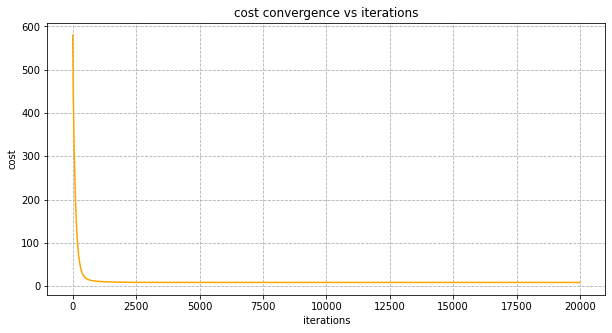

In [317]:
xx = np.arange(len(cost))
yy = cost

fig = plt.figure(figsize=(10,5))
plt.plot(xx,yy,color='orange')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.title('cost convergence vs iterations')
plt.grid(ls = '--')

## Predict

In [318]:
def pred_result(x,w):
    
    pred = x @ w
    
    return pred

In [319]:
x_test_std = std_scaler.transform(x_test)
added = np.ones((len(x_test),1))
x_test_added = np.hstack([x_test_std,added])

In [329]:
y_pred = pred_rst(x_test_added,weight)
print(y_pred)

[ 2.43982828e+01  2.42913853e+01  2.02753342e+01  2.85728090e+01
  1.76796671e+01  1.10901313e+01  1.03128734e+01  2.71727633e+01
  2.05016471e+01  2.31125889e+01  3.26903339e+01  2.71006185e+01
  2.25384709e+01  2.86877396e+01  3.27415855e+01  4.01774768e+01
  2.49045655e+01  1.78014187e+01  2.27373892e+01  1.76898011e+01
  2.70734450e+01  2.48684035e+01  2.87091028e+01  2.05239469e+01
  2.45897493e+01  3.05183562e+01  2.06178521e+01  1.72661630e+01
  1.78281491e+01  2.48081978e+01  1.48370301e+01  3.40264073e+01
  2.98237977e+01  2.36080277e+01  2.36381176e+01  1.81763761e+01
  1.35476888e+01  3.12652040e+01  2.29430861e+01  2.30421457e+01
  1.58230252e+01  3.42734993e+01  2.88690825e+01  1.74664576e+01
  2.08404355e+01  3.32755488e+01  2.38455562e+01  2.27521082e+01
  2.56211309e+01  5.57142904e+00  2.20920604e+01  2.55717087e+01
  1.21729838e+01  2.03211121e+01  1.57761240e+01  3.48763367e+01
  1.82088459e+01  2.49019341e+01  2.32446606e+01  3.00031555e+01
  6.22281576e+00  3.62489

## Compute Accuracy

In [327]:
def compute_accu(y,pred):
    
    n = len(y)
    accu_save = []
    
    for j in range(n):
        
        accu = abs(y[j]-pred[j]) / y[j]
        accu_save.append(accu)
        
    accu_avg = sum(accu_save) / len(accu_save)
    
    return (1-accu_avg)

In [328]:
compute_accu(y_test,y_pred)

0.8453256070510098